In [1]:
# Autor: João Victor de Luna Freire Santiago

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [47]:
crioterapia_treino = pd.read_csv('C:\\Users\\Joaol\\Downloads\\trabalho\\dados_cryotherapy.csv', encoding="utf-8")

In [57]:
data_treino = np.array(crioterapia_treino[['Sexo', 'Idade', 'Numero_Verrugas', 'Tipo','Area']])

data_classif = np.array(crioterapia_treino['Resultado_Tratamento'])

In [58]:
crioterapia_treino.dtypes

Sexo                    int64
Idade                   int64
Tempo                   int64
Numero_Verrugas         int64
Tipo                    int64
Area                    int64
Resultado_Tratamento    int64
dtype: object

In [59]:
crioterapia_treino.head(10)

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
0,1,35,12,5,1,100,0
1,1,29,7,5,1,96,1
2,1,50,8,1,3,132,0
3,1,32,11,7,3,750,0
4,1,67,9,1,1,42,0
5,1,41,8,2,2,20,1
6,1,36,11,2,1,8,0
7,1,59,3,3,3,20,0
8,1,20,4,12,1,6,1
9,2,34,11,3,3,150,0


In [60]:
crioterapia_treino.tail(10)

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
80,2,22,5,2,1,70,1
81,1,16,11,3,2,60,1
82,2,28,5,9,1,100,1
83,1,40,11,9,2,80,0
84,1,30,1,10,1,115,1
85,2,34,12,3,3,95,0
86,2,20,3,6,1,75,1
87,2,35,8,8,3,100,0
88,1,24,10,10,1,20,1
89,1,19,8,8,1,160,1


In [61]:
crioterapia_treino.shape

(90, 7)

In [62]:
def plot_corr(crioterapia, size=10):
    corr = crioterapia.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

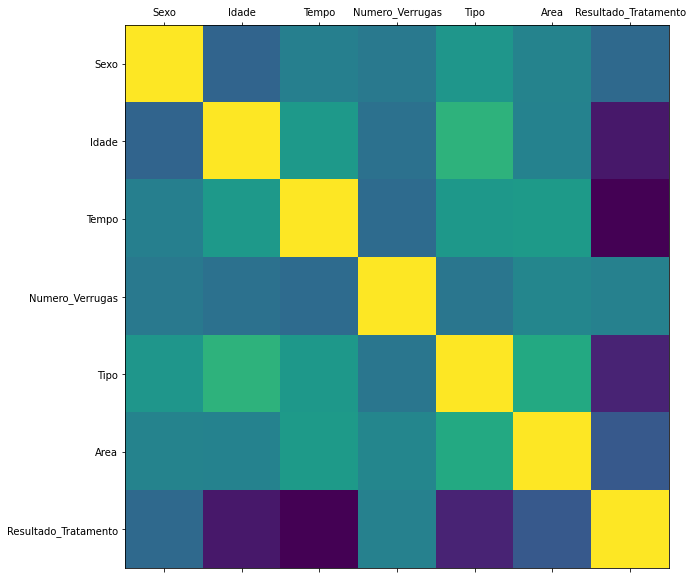

In [63]:
plot_corr(crioterapia_treino)

In [65]:
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [66]:
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[  2  15   2   3  70]
 [  2  17   3   1  63]
 [  1  19   8   1 160]
 [  1  23   7   3  72]
 [  1  30  10   1 115]
 [  1  17  10   1  63]
 [  2  15  10   3  70]
 [  1  20   3   1   6]
 [  2  15   2   1  30]
 [  2  21   5   1  35]
 [  1  22   2   1  70]
 [  2  34   3   3  95]
 [  1  59   3   3  20]
 [  1  36   2   1   8]
 [  1  17   2   1  10]
 [  1  34   1   3  95]
 [  2  34   3   3 150]
 [  2  18   1   1  80]
 [  1  35   2   1 100]
 [  1  16   3   2  60]
 [  2  15   1   1   6]
 [  1  18   1   1  80]
 [  1  24  10   1  20]
 [  1  27   7   1   6]
 [  2  15  12   1  30]
 [  1  35   9   1 100]
 [  1  27   5   1   6]
 [  2  36   4   1   8]
 [  2  16   1   2  60]
 [  1  17   4   1  63]
 [  2  17   2   1  10]
 [  1  20   3   1   6]
 [  1  15   5   1   6]
 [  2  34   3   3  95]
 [  2  23  12   3  72]
 [  1  34   1   3 150]
 [  2  15   3   1   4]
 [  2  27   2   1   6]
 [  2  35   5   3 100]
 [  2  19   9   1 160]
 [  2  21   7   1  35]
 [  1  24

In [68]:
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(crioterapia_treino)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(crioterapia_treino)) * 100))

70.00% nos dados de treino
30.00% nos dados de teste


In [69]:
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [70]:
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.7936507936507936
Na Base de Treinamento


In [71]:

print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.8148148148148148
na Base de Teste


In [72]:
from sklearn import metrics

In [73]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[10  2]
 [ 3 12]]

Classification Report
              precision    recall  f1-score   support

           1       0.77      0.83      0.80        12
           0       0.86      0.80      0.83        15

    accuracy                           0.81        27
   macro avg       0.81      0.82      0.81        27
weighted avg       0.82      0.81      0.82        27



In [74]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_treino, y_treino.ravel())

RandomForestClassifier(random_state=42)

In [93]:
rf_predict_train = modelo_v2.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [94]:
rf_predict_test = modelo_v2.predict(x_val)
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, rf_predict_test)))
print()

Exatidão (Accuracy): na Base de Teste 0.8148



In [95]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[11  1]
 [ 4 11]]

Classification Report
              precision    recall  f1-score   support

           1       0.73      0.92      0.81        12
           0       0.92      0.73      0.81        15

    accuracy                           0.81        27
   macro avg       0.82      0.82      0.81        27
weighted avg       0.84      0.81      0.81        27



In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(x_treino, y_treino.ravel())
lr_predict_test = modelo_v3.predict(x_val)

In [98]:
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_val, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): na Base de Teste 0.7037

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.83      0.71        12
           0       0.82      0.60      0.69        15

    accuracy                           0.70        27
   macro avg       0.72      0.72      0.70        27
weighted avg       0.73      0.70      0.70        27



In [ ]:
# Persistência do Modelo de Machine Learning

In [209]:
from sklearn.model_selection import train_test_split 
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import numpy as np
import joblib

In [210]:
crioterapia = pd.read_csv('C:\\Users\\Joaol\\Downloads\\trabalho\\dados_cryotherapy.csv', encoding="utf-8")

In [223]:
data_treino = np.array(crioterapia_treino[['Sexo', 'Idade', 'Numero_Verrugas']])

data_classif = np.array(crioterapia_treino['Resultado_Tratamento'])

x_treino, dados_val, y_treino, pols_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [224]:
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [225]:
joblib.dump(modelo_NB, 'crioterapia_MNB.pkl')

['crioterapia_MNB.pkl']

In [226]:
# Utilizando o Modelo Persistido de Machine Learning 

In [227]:
#Conjunto de importacoes
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import joblib

In [228]:
modelo_NB = GaussianNB()
#Carrega o modelo persistido no arquivo modelo_mamifero_MNB.pkl
modelo_NB = joblib.load('crioterapia_MNB.pkl')

In [233]:
sexo = int(input("Digite o sexo: "))
idade = int(input("Digite a idade: "))
tempo = int(input("Digite o Tempo: "))
numero_Verrugas = int(input("Digite o Numero de verrugas: "))


Digite o sexo: 2
Digite a idade: 20
Digite o Tempo: 3
Digite o Numero de verrugas: 6


In [234]:
res = modelo_NB.predict([[int(sexo), int(idade), int(tempo)]])
print("Classificacao: " + str(res))

Classificacao: [1]
